<a href="https://colab.research.google.com/github/yenlung/ML-Demo/blob/main/%E3%80%90Demo01%E3%80%91%E6%80%8E%E9%BA%BC%E8%A9%95%E9%87%8F%E4%B8%80%E5%80%8B%E6%A8%A1%E5%9E%8B%E7%9A%84%E5%A5%BD%E5%A3%9E%E5%91%A2%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import classification_report, confusion_matrix

## 1. underfitting 和 overfitting

我們用一個簡單的例子, 來看 underfitting 和 overfitting, 還有著名的 "bias–variance tradeoff"。

誤差其實有兩類, 一是所謂的 bias, 另一是 variance。實作上 bias 的誤差通常是訓練資料的誤差, 而 variance 是測試資料 (或驗證資料) 的誤差。

先來產我們準備要 fit 的數據集。

In [ ]:
np.random.seed(42)

In [ ]:
x = np.linspace(0.2, 3, 50)
y = np.log(x) + 0.1 * np.random.randn(50)

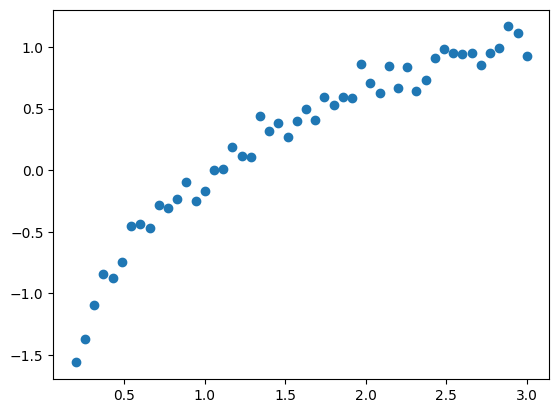

In [ ]:
plt.scatter(x, y);

因為這裡只是要為大家介紹 underfitting 和 overfitting, 程式就不一一解釋。不過, 示範一下我們其實可以告訴 Colab 想法, Colab 的 AI 可以自動寫出來! (`prompt` 就是我們告訴 Colab 要做什麼的地方)

### (1) underfitting (high bias)

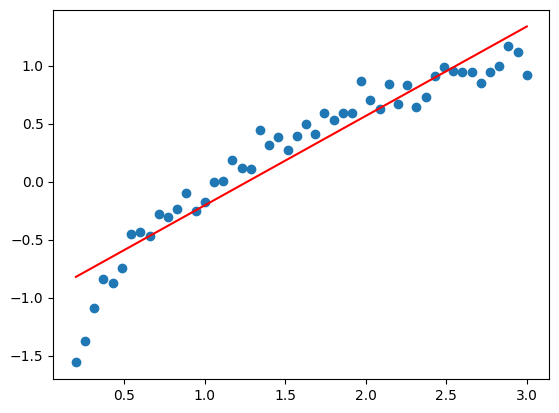

In [ ]:
# prompt: 用 scikit-learn 套件, 線性迴歸去 fit (x,y), 並畫出結果

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x.reshape(-1, 1), y)

# Predict the output for the given input
y_pred = model.predict(x.reshape(-1, 1))

# Plot the data and the fitted line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()


### (2) 恰到好處 (low bias, low variance)

這次用比較合理的 kernel 版線性迴歸。還記得就是我們找一些很適合生其他函數的函數...

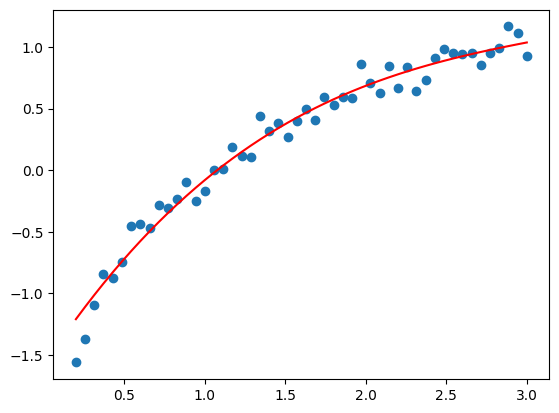

In [ ]:
# prompt: 用 scikit-learn 核技巧的線性迴歸, 即 KernelRidge 去 fit (x,y) 並畫出圖

model = KernelRidge(alpha=0.1, kernel='poly', degree=3)
model.fit(x.reshape(-1, 1), y)

y_pred = model.predict(x.reshape(-1, 1))

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()


### (3) overfitting (low bais, high variance)

我們來看個「訓練 0 誤差」, 但相信你不敢用來做預測的...

/usr/local/lib/python3.10/dist-packages/numpy/polynomial/legendre.py:1412: RankWarning: The fit may be poorly conditioned
  return pu._fit(legvander, x, y, deg, rcond, full, w)


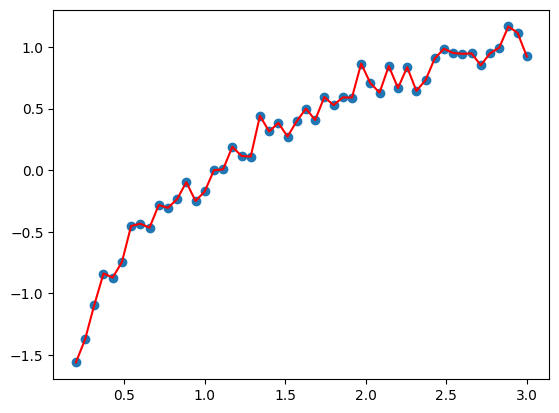

In [ ]:
# prompt:  用  Legendre polynomials 找到完全圖過 (x,y) 所有點的多項式, 並畫出圖來

import numpy as np
import matplotlib.pyplot as plt


# Fit Legendre polynomials
from scipy.special import legendre
p = np.polynomial.Legendre.fit(x, y, 51)

# Plot data and fitted polynomial
plt.scatter(x, y)
plt.plot(x, p(x), color='red')
plt.show()


## 2. 用糖尿病數據集, 理解 Confusion Matrix

In [ ]:
diabetes = datasets.load_diabetes()

原本迴歸形的數據, 改為分類。

In [ ]:
X = diabetes.data
Y = (diabetes.target > 100).astype(int)

In [ ]:
X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613])

In [ ]:
Y[0]

1

切訓練及測試資料。

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=42)


一般都要做基本的長模化。

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

常模化後的結果。

In [ ]:
x_train[0]

array([ 1.49836523,  1.06136988,  0.21990201,  1.13887373,  0.72847289,
        1.05589332, -0.82445065,  0.71103773,  0.54748197, -0.06144896])

然後進入標準三部曲程式。

### step 1: 打開邏輯式回歸函數學習機

In [ ]:
model = LogisticRegression()

### step 2: 訓練

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

step 3: 預測

In [ ]:
y_pred = model.predict(x_test)

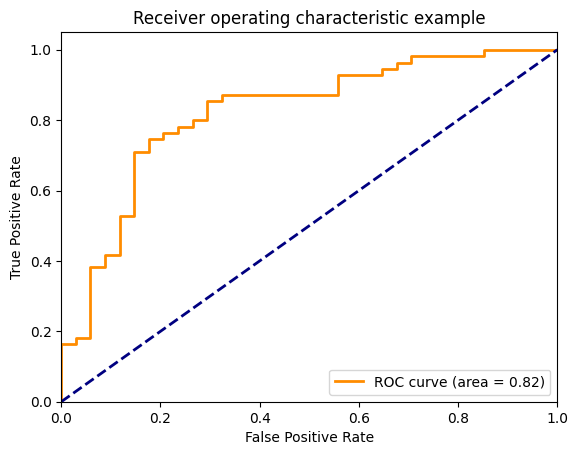

In [ ]:
# prompt: 可以畫出 model 的 ROC 曲線嗎?

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the test set
y_prob = model.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [ ]:
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.74      0.68      0.71        34
           1       0.81      0.85      0.83        55

    accuracy                           0.79        89
   macro avg       0.78      0.77      0.77        89
weighted avg       0.78      0.79      0.78        89



In [ ]:
cm

array([[23, 11],
       [ 8, 47]])